In [1]:
import pandas as pd

df = pd.read_csv('cross-referenced.csv')

df['VEH_CATEGORY'] = df['VEH_CATEGORY'].astype('category')
df["VEH_CATEGORY"] = df["VEH_CATEGORY"].cat.codes
df['SEX_CD'] = df['SEX_CD'].map({'F': 0, 'M': 1})
df['OCCUR_TM'] = pd.to_datetime(df['OCCUR_TM'], format='%H:%M:%S')
df['OCCUR_TM'] = df['OCCUR_TM'].dt.hour * 3600 + df['OCCUR_TM'].dt.minute * 60 + df['OCCUR_TM'].dt.second
reference_date = pd.Timestamp('1970-01-01')
df['OCCUR_DT'] = (pd.to_datetime(df['OCCUR_DT'], format='%Y-%m-%d') - reference_date).dt.days
df['RPTED_AGE']=df['RPTED_AGE'].astype('int')
df = df.dropna(subset=['bct2020'])

df = df.drop('VEH_SEARCH_CONSENT_FLG', axis=1)

df['bct2020'] =  df['bct2020'].astype('int')


In [2]:
df.apply(lambda x: x.unique())

EVNT_KEY              [261181977, 261182032, 261182046, 261182058, 2...
OCCUR_DT              [19358, 19359, 19360, 19361, 19362, 19363, 193...
OCCUR_TM              [8700, 6300, 6540, 31200, 15000, 1800, 16800, ...
PRECINCT              [18, 69, 75, 88, 7, 23, 45, 62, 67, 70, 71, 79...
VEH_SEIZED_FLG                                            [False, True]
VEH_SEARCHED_FLG                                          [False, True]
VEH_CHECKPOINT_FLG                                        [False, True]
FORCE_USED_FLG                                            [False, True]
ARREST_MADE_FLG                                           [False, True]
SUMMON_ISSUED_FLG                                         [False, True]
VEH_CATEGORY                                         [1, 0, 4, 2, 3, 5]
RPTED_AGE             [58, 17, 34, 26, 49, 56, 32, 45, 33, 29, 46, 5...
SEX_CD                                                           [0, 1]
RACE_DESC             [HISPANIC, BLACK, ASIAN / PACIFIC ISLANDER

In [3]:
df['RACE_DESC'] = df['RACE_DESC'].astype('category')
df["RACE_DESC"] = df["RACE_DESC"].cat.codes



In [4]:
import pandas as pd

race_mapping = {0: 'AMERICAN INDIAN/ALASKAN NATIVE', 
                1: 'ASIAN / PACIFIC ISLANDER', 
                2: 'BLACK', 
                3: 'HISPANIC', 
                4: 'OTHER', 
                5: 'WHITE'}

df['RACE_DESC_LABEL'] = df['RACE_DESC'].map(race_mapping)

total_stops = len(df)
vehicle_searched = df[df['VEH_SEARCHED_FLG'] == True].shape[0]
vehicle_seized = df[df['VEH_SEIZED_FLG'] == True].shape[0]
force_used = df[df['FORCE_USED_FLG'] == True].shape[0]
arrest_made = df[df['ARREST_MADE_FLG'] == True].shape[0]
summons_issued = df[df['SUMMON_ISSUED_FLG'] == True].shape[0]
race_counts = df['RACE_DESC_LABEL'].value_counts()
black_stops = race_counts.get('BLACK', 0)
latinx_stops = race_counts.get('HISPANIC', 0)
white_stops = race_counts.get('WHITE', 0)
black_stops_pct = (black_stops / total_stops) * 100 if total_stops != 0 else 0
latinx_stops_pct = (latinx_stops / total_stops) * 100 if total_stops != 0 else 0
white_stops_pct = (white_stops / total_stops) * 100 if total_stops != 0 else 0
arrests_by_race = df[df['ARREST_MADE_FLG'] == True]['RACE_DESC_LABEL'].value_counts()
black_arrests = arrests_by_race.get('BLACK', 0)
latinx_arrests = arrests_by_race.get('HISPANIC', 0)
white_arrests = arrests_by_race.get('WHITE', 0)
black_arrests_pct = (black_arrests / arrest_made) * 100 if arrest_made != 0 else 0
latinx_arrests_pct = (latinx_arrests / arrest_made) * 100 if arrest_made != 0 else 0
searches_by_race = df[df['VEH_SEARCHED_FLG'] == True]['RACE_DESC_LABEL'].value_counts()
black_search_rate = (searches_by_race.get('BLACK', 0) / black_stops) if black_stops != 0 else 0
latinx_search_rate = (searches_by_race.get('HISPANIC', 0) / latinx_stops) if latinx_stops != 0 else 0
white_search_rate = (searches_by_race.get('WHITE', 0) / white_stops) if white_stops != 0 else 0
black_vs_white_search_rate = black_search_rate / white_search_rate if white_search_rate != 0 else 0
latinx_vs_white_search_rate = latinx_search_rate / white_search_rate if white_search_rate != 0 else 0
summary = f"""
Our dataset, used for machine learning and data analysis, includes {total_stops} traffic stops. These incidents involved a range of diverse outcomes:
- Vehicle searches were conducted in approximately {vehicle_searched} cases.
- Vehicles were seized in around {vehicle_seized} cases.
- Force was used in {force_used} cases.
- Arrests were made in about {arrest_made} incidents.
- Tickets or summons were issued in {summons_issued} stops.

Black and Latinx drivers were disproportionately represented in traffic stops:
- Black drivers accounted for {black_stops_pct:.2f}% of the stops.
- Latinx drivers accounted for {latinx_stops_pct:.2f}% of the stops.
- White drivers accounted for only {white_stops_pct:.2f}% of the total stops.

Arrests also showed a racial disparity:
- {black_arrests_pct:.2f}% of individuals arrested during traffic stops were Black.
- {latinx_arrests_pct:.2f}% of individuals arrested were Latinx.

Search rates further highlight these disparities:
- Black drivers were searched at a rate roughly {black_vs_white_search_rate:.2f} times higher than White drivers.
- Latinx drivers were searched at a rate about {latinx_vs_white_search_rate:.2f} times greater than their White counterparts.
"""
print(summary)



Our dataset, used for machine learning and data analysis, includes 820888 traffic stops. These incidents involved a range of diverse outcomes:
- Vehicle searches were conducted in approximately 21161 cases.
- Vehicles were seized in around 10741 cases.
- Force was used in 588 cases.
- Arrests were made in about 26744 incidents.
- Tickets or summons were issued in 505917 stops.

Black and Latinx drivers were disproportionately represented in traffic stops:
- Black drivers accounted for 31.32% of the stops.
- Latinx drivers accounted for 31.05% of the stops.
- White drivers accounted for only 22.62% of the total stops.

Arrests also showed a racial disparity:
- 45.54% of individuals arrested during traffic stops were Black.
- 41.24% of individuals arrested were Latinx.

Search rates further highlight these disparities:
- Black drivers were searched at a rate roughly 11.34 times higher than White drivers.
- Latinx drivers were searched at a rate about 6.47 times greater than their White 

C:\Users\yusay\AppData\Local\Temp\ipykernel_17304\3064256960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='RACE_DESC_LABEL', data=df, palette='viridis', order=df['RACE_DESC_LABEL'].value_counts().index)


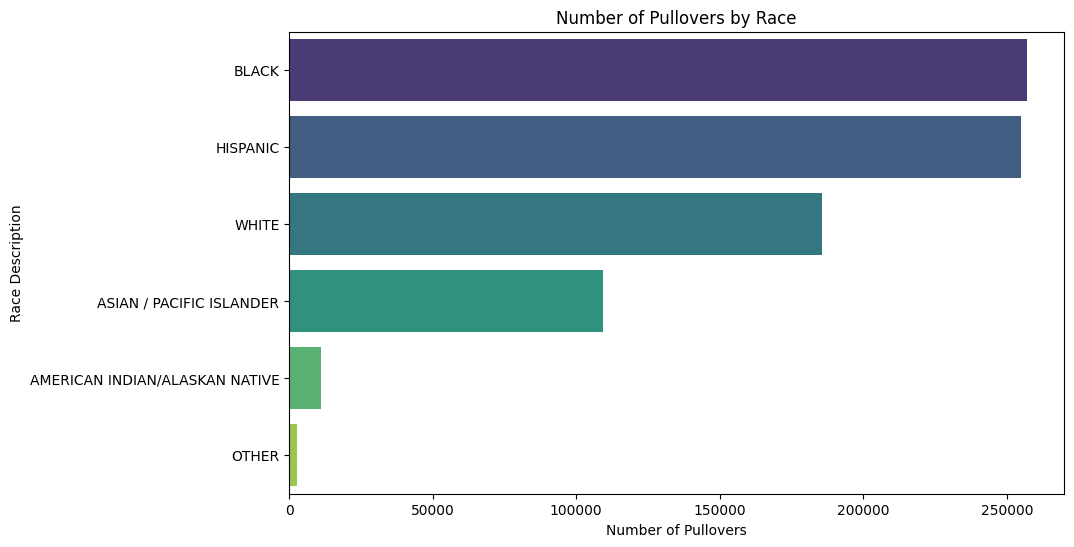

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(y='RACE_DESC_LABEL', data=df, palette='viridis', order=df['RACE_DESC_LABEL'].value_counts().index)
plt.xlabel('Number of Pullovers')
plt.ylabel('Race Description')
plt.title('Number of Pullovers by Race')
plt.show()

C:\Users\yusay\AppData\Local\Temp\ipykernel_17304\4241957009.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sr = df[df['VEH_SEARCHED_FLG'] == True].groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size() / df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size()
C:\Users\yusay\AppData\Local\Temp\ipykernel_17304\4241957009.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sr = df[df['VEH_SEARCHED_FLG'] == True].groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size() / df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size()


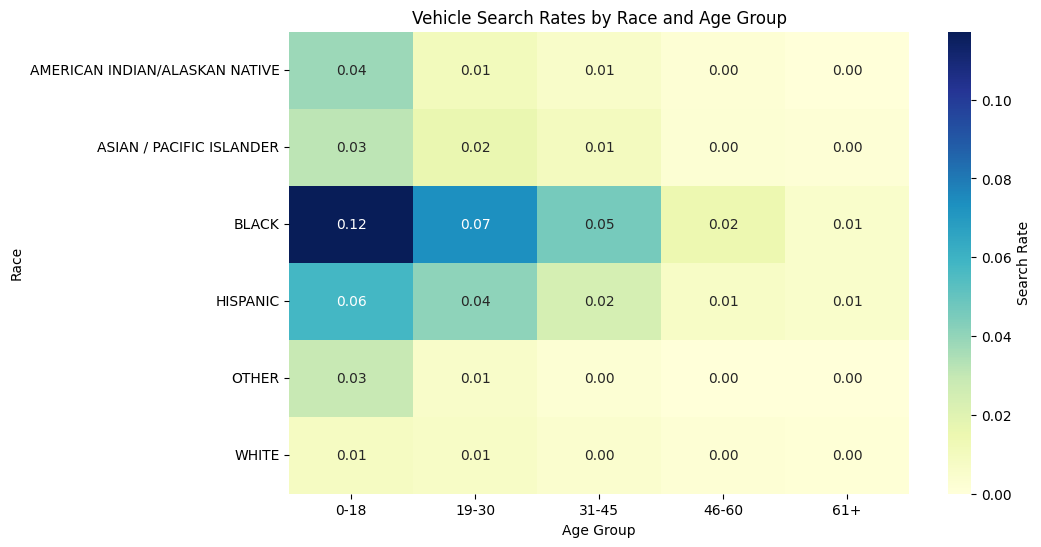

In [6]:
df['AGE_GROUP'] = pd.cut(df['RPTED_AGE'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])
sr = df[df['VEH_SEARCHED_FLG'] == True].groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size() / df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP']).size()
sr = sr.reset_index(name='SEARCH_RATE')
sr = sr.pivot(index='RACE_DESC_LABEL', columns='AGE_GROUP', values='SEARCH_RATE')
plt.figure(figsize=(10, 6))
sns.heatmap(sr, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Search Rate'})
plt.title('Vehicle Search Rates by Race and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()


C:\Users\yusay\AppData\Local\Temp\ipykernel_17304\2661070158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrest_by_race_age = df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP'])['ARREST_MADE_FLG'].mean().unstack()


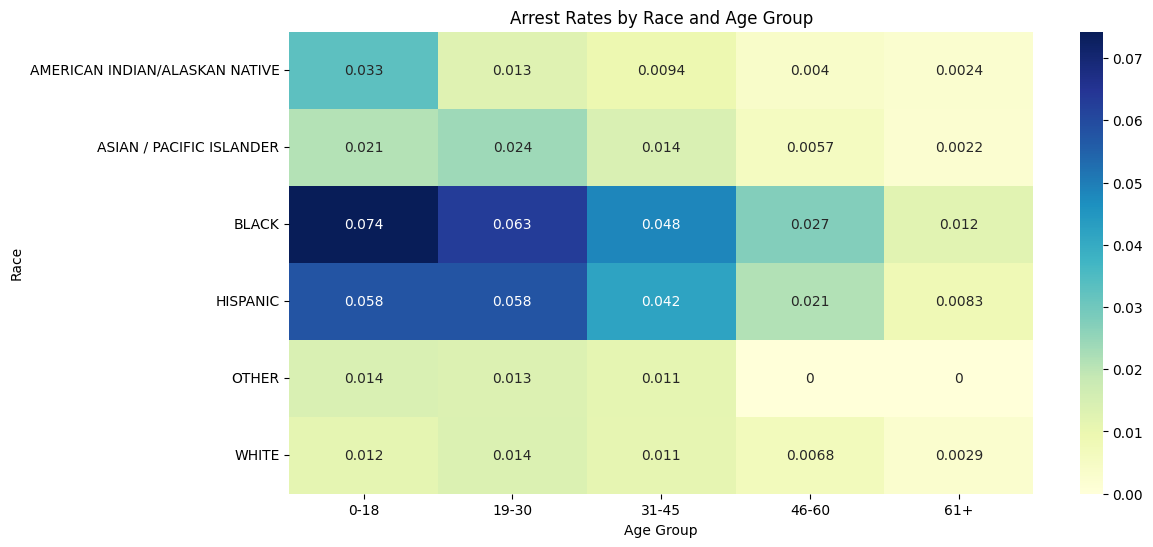

In [7]:
arrest_by_race_age = df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP'])['ARREST_MADE_FLG'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(arrest_by_race_age, annot=True, cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.title('Arrest Rates by Race and Age Group')
plt.show()


C:\Users\yusay\AppData\Local\Temp\ipykernel_17304\4211379196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP'])['FORCE_USED_FLG'].mean().unstack()


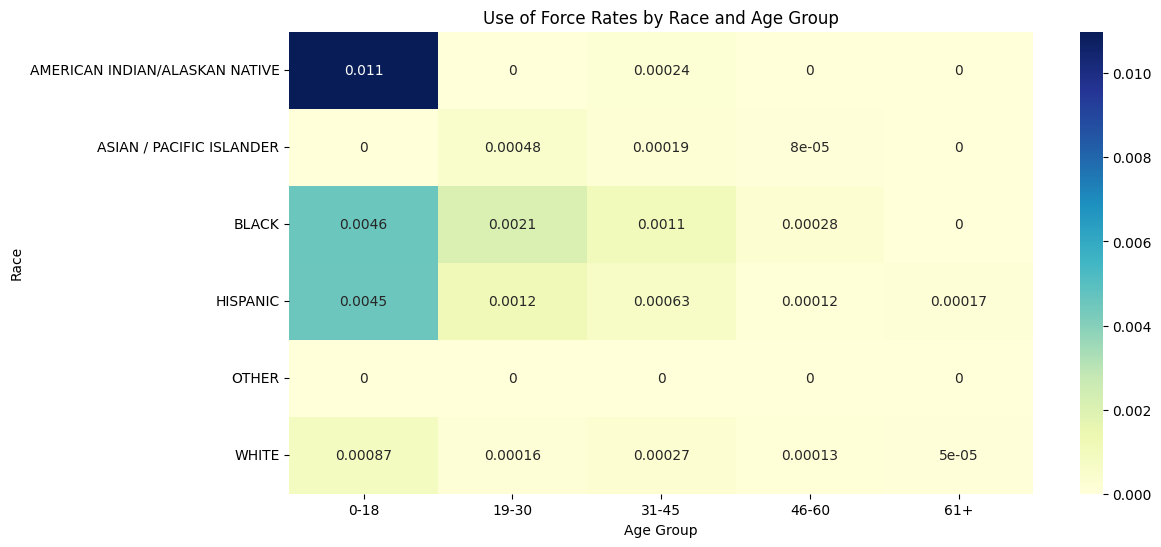

In [8]:
a = df.groupby(['RACE_DESC_LABEL', 'AGE_GROUP'])['FORCE_USED_FLG'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(a, annot=True, cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.title('Use of Force Rates by Race and Age Group')
plt.show()


In [9]:
from scipy.stats import pointbiserialr, chi2_contingency

age = df['RPTED_AGE']
vehicle_searched = df['VEH_SEARCHED_FLG']

valid_idx = ~age.isna() & ~vehicle_searched.isna()
corr, p_value = pointbiserialr(age[valid_idx], vehicle_searched[valid_idx])
print(f'Point-biserial correlation between Age and Vehicle Searched Flag: {corr:.3f}, p-value: {p_value:.3f}')


Point-biserial correlation between Age and Vehicle Searched Flag: -0.091, p-value: 0.000


In [10]:
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

cramers_v_value = cramers_v(df['RACE_DESC'], df['VEH_SEARCHED_FLG'])
print(f"Cramér's V between Race and Vehicle Searched Flag: {cramers_v_value:.3f}")


Cramér's V between Race and Vehicle Searched Flag: 0.109


In [11]:
from scipy.stats import chi2_contingency

a = pd.crosstab(df['RACE_DESC'], df['VEH_SEARCHED_FLG'])
chi2, p, dof, expected = chi2_contingency(a)

print(f'Chi-square Test Statistic: {chi2}, p-value: {p}')


Chi-square Test Statistic: 9824.092141302019, p-value: 0.0
